# Lekce 1

V této lekci projdeme následující témata:
- kumulativní součet hodnot,
- vizualizace složené z více sérií

Ke zpracování dat využijeme moduly  `pandas` a ke tvorbě vizualizací modul `matplotlib` a jeho nadstavbu `seaborn`.

V rámci lekce budeme využívat následující datové soubory:
- [sales_actual.csv](data/sales_actual.csv)
- [ales_plan.csv](data/ales_plan.csv)
- [user_registration.json](user_registration.json)

## Kumulativní součet

Kumulativní součet (running total) nejčastěji používáme v kombinaci s nějakým časovým údajem. Hodnota kumulativního součtu pro nějaký časový údaj je součtem všech hodnot od začátku časového období až pro daný údaj. Například kumulativní tržby za únor jsou součtem tržeb za leden a za únor, kumulativní součet za březen je součtem tržeb za leden, únor a březen atd.

Podívejme se na následující tabulku, která obsahuje plán tržeb firmy v tis. dolarů za jednotlivé měsíce roků 2021 a 2022.

Protože budeme pracovat s poměrně vysokými čísly, nastavíme formát zobrazení čísla tak, aby používal oddělovač tisíců. Plán je uložený v souboru `data/sales_plan.csv`. Pomocí metod `head()` a `tail()` se podiváme na začátek a konec datového souboru.

### Další možnosti využití

- Bankovní účet: Kumulativní součet hodnoty transakcí udává zůstatek na bankovním účtu.
- Webová stránka: Z data o registracích uživatelů můžeme sledovat celkový počet registrovaných uživatelů.
- Řízení projektů: Srovnání kumulativního součtu odpracovaných hodin pro daný úkol udává, kolik bylo celkem na úkolu odpracováno a z kolika procent by měl být úkol hotový.
- Řízení kvality ve výrobě: Pomocí kumulativního součtu můžeme sledovat celkový počet vadných výrobků v čase.
- Řízení zásob: Pomocí kumulativního součtu můžeme sledovat vývoj množství daného výrobku na skladě.

In [18]:
import matplotlib.pyplot as plt
import pandas

# Načteme data
df_plan = pandas.read_csv("data/sales_plan.csv")
# Zobrazíme si hlavičku (prvních 5 řádků)
df_plan.head()

,year,month,sales
0,2021,1,12000000.0
1,2021,2,9000000.0
2,2021,3,9000000.0
3,2021,4,11000000.0
4,2021,5,12000000.0


In [19]:
# Zobrazíme "ocas" (posledních 5 řádků)
df_plan.tail()

,year,month,sales
31,2023,8,10000000.0
32,2023,9,9000000.0
33,2023,10,9000000.0
34,2023,11,11000000.0
35,2023,12,11000000.0


Kumulativní součet vytvoříme pomocí metody `cumsum()`.

In [20]:
df_plan["sales_plan_cumsum"] = df_plan["sales"].cumsum()
df_plan

,year,month,sales,sales_plan_cumsum
0,2021,1,12000000.0,12000000.0
1,2021,2,9000000.0,21000000.0
2,2021,3,9000000.0,30000000.0
3,2021,4,11000000.0,41000000.0
4,2021,5,12000000.0,53000000.0
5,2021,6,10000000.0,63000000.0
6,2021,7,12000000.0,75000000.0
7,2021,8,11000000.0,86000000.0
8,2021,9,11000000.0,97000000.0
9,2021,10,8000000.0,105000000.0


U kumulativního součtu někdy požadujeme, aby byl pro určité celky "vynulován", nebo-li aby začínal opět od začátku. V našem případě je to u sloupce `year`. Zařídíme to pomocí metody `groupby()`.

In [21]:
df_plan["sales_plan_cumsum"] = df_plan.groupby("year")["sales"].cumsum()
df_plan

,year,month,sales,sales_plan_cumsum
0,2021,1,12000000.0,12000000.0
1,2021,2,9000000.0,21000000.0
2,2021,3,9000000.0,30000000.0
3,2021,4,11000000.0,41000000.0
4,2021,5,12000000.0,53000000.0
5,2021,6,10000000.0,63000000.0
6,2021,7,12000000.0,75000000.0
7,2021,8,11000000.0,86000000.0
8,2021,9,11000000.0,97000000.0
9,2021,10,8000000.0,105000000.0


### Kumulativní součet s využitím agregace

Plán tržeb může mít firma jako jednoduchou tabulku, údaje o skutečných kontraktech (např. v účetním systému) jsou ale složitější, protože budou zpravidla obsahovat informace o zákazníkovi, datum uzavření kontraktu atd.

In [22]:
df_actual = pandas.read_csv("data/sales_actual.csv")
df_actual = df_actual.sort_values("date")
df_actual.head()

,date,company,country,contract_value,sales_manager
529,2021-01-04,"Khan, Davidson and Green LLC",United Kingdom,95336.0,Morgan Sarah
272,2021-01-05,"Comencini, Mastroianni e Calarco SPA Group",Italy,425864.0,Jones Leon
341,2021-01-06,Zacco-Callegaro Group s.r.l.,Italy,666505.0,Thomas Denise
538,2021-01-07,Morrison-Johnston PLC,United Kingdom,518377.0,Morgan Sarah
27,2021-01-08,Dionne-Fréchette PLC,Canada,356837.0,Jones Leon


Naším úkolem je porovnat, nakolik se skutečné tržby vyvíjejí podle plánu. K tomu je potřeba provést několik kroků.

1. Provést agregaci podle čísla měsíce a roku.
1. Vypočítat kumulativní součet.
1. Propojit obě tabulky do jedné.

Pořadí kroků je poměrně důležité, protože nesprávné pořadí kroků může vést ke špatným výsledkům. Výsledek můžeme prezentovat například pomocí grafu.

#### Přidání čísla měsíce

Podívejme se na informace o datových typech v naší tabulce.

In [23]:
df_actual.dtypes

date               object
company            object
country            object
contract_value    float64
sales_manager      object
dtype: object

Sloupec s číslem měsíce v tabulce nemáme, můžeme jej ale snadno přidat pomocí vlastnosti `dt.month`.
Nejprve však musíme sloupec `date` převést na typ datum, protože `pandas` ho načetl jako typ `object`.

In [24]:
df_actual["date"] = pandas.to_datetime(df_actual["date"])
df_actual.dtypes

date              datetime64[ns]
company                   object
country                   object
contract_value           float64
sales_manager             object
dtype: object

Nyní můžeme přidat výpočet měsíce. Podobně jako číslo měsíce můžeme přidat i rok.

In [25]:
df_actual["month"] = df_actual["date"].dt.month
df_actual["year"] = df_actual["date"].dt.year
df_actual.head()

,date,company,country,contract_value,sales_manager,month,year
529,2021-01-04,"Khan, Davidson and Green LLC",United Kingdom,95336.0,Morgan Sarah,1,2021
272,2021-01-05,"Comencini, Mastroianni e Calarco SPA Group",Italy,425864.0,Jones Leon,1,2021
341,2021-01-06,Zacco-Callegaro Group s.r.l.,Italy,666505.0,Thomas Denise,1,2021
538,2021-01-07,Morrison-Johnston PLC,United Kingdom,518377.0,Morgan Sarah,1,2021
27,2021-01-08,Dionne-Fréchette PLC,Canada,356837.0,Jones Leon,1,2021


Agregaci již též známe, použijeme k ní metodu `groupby()` a dále metodu `sum()`. Výsledky uložíme do nového dataframe, protože agregace znamená **ztrátu informace** a s původními hodnotami ještě budeme pracovat.

In [26]:
df_actual_grouped = df_actual.groupby(["year", "month"]).sum()
df_actual_grouped["sales_actual_cumsum"] = df_actual_grouped.groupby("year")["contract_value"].cumsum()
df_actual_grouped.head()

C:\Users\jirip\AppData\Local\Temp\ipykernel_25364\2203460872.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_actual_grouped = df_actual.groupby(["year", "month"]).sum()


contract_value  sales_actual_cumsum
year month                                     
2021 1           6649945.0            6649945.0
     2           8091903.0           14741848.0
     3          10722064.0           25463912.0
     4           8550411.0           34014323.0
     5           8786638.0           42800961.0

Nyní můžeme propojit dataframe `df_plan` a `df_actual_grouped` do jednoho dataframe.

In [27]:
df_joined = pandas.merge(df_plan, df_actual_grouped, on=["month", "year"])
df_joined

,year,month,sales,sales_plan_cumsum,contract_value,sales_actual_cumsum
0,2021,1,12000000.0,12000000.0,6649945.0,6649945.0
1,2021,2,9000000.0,21000000.0,8091903.0,14741848.0
2,2021,3,9000000.0,30000000.0,10722064.0,25463912.0
3,2021,4,11000000.0,41000000.0,8550411.0,34014323.0
4,2021,5,12000000.0,53000000.0,8786638.0,42800961.0
5,2021,6,10000000.0,63000000.0,9466508.0,52267469.0
6,2021,7,12000000.0,75000000.0,7754752.0,60022221.0
7,2021,8,11000000.0,86000000.0,8083338.0,68105559.0
8,2021,9,11000000.0,97000000.0,7114588.0,75220147.0
9,2021,10,8000000.0,105000000.0,8300097.0,83520244.0


## Vytvoření vizualizace z více sérií

Nyní vytvoříme graf pro prezentaci výsledků. Můžeme např. zkombinovat čárový a sloupcový graf, kde čárový graf obsahuje plán tržeb a sloupcový skutečné tržby. Po prvním příkazu uložíme výsledek do proměnné `ax`. Metoda `.plot()` totiž vrací odkaz na vygenerovaný graf, abychom do něj mohli přidávat další data nebo jej dále upravovat. Ve druhém příkazu zadáme parametr `ax` a vložíme mu jako hodnotu graf `ax`. Tím říkáme, aby modul nevytvářel nový graf, ale vložil druhý (čárový) graf k prvnímu (sloupcovému.

In [28]:
year = 2022
df_joined_plot = df_joined[df_joined["year"] == year]
df_joined_plot = df_joined_plot.reset_index()
df_joined_plot.head()

,index,year,month,sales,sales_plan_cumsum,contract_value,sales_actual_cumsum
0,12,2022,1,12000000.0,12000000.0,9798565.4,9798565.4
1,13,2022,2,9000000.0,21000000.0,11314932.2,21113497.6
2,14,2022,3,9000000.0,30000000.0,13173404.4,34286902.0
3,15,2022,4,11000000.0,41000000.0,12718895.8,47005797.8
4,16,2022,5,11000000.0,52000000.0,9546852.9,56552650.7


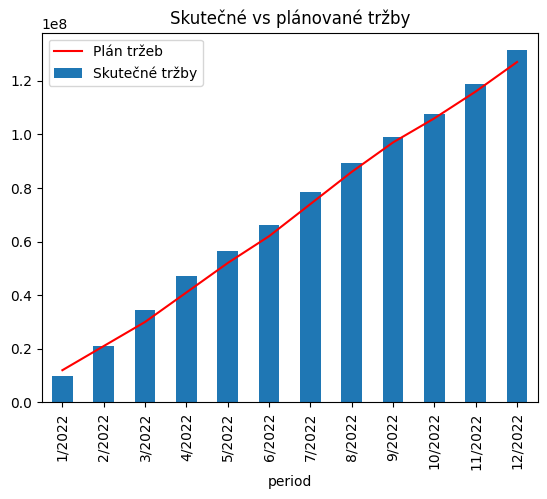

In [37]:
# Sloupcový graf skutečných tržeb
ax = df_joined_plot["sales_plan_cumsum"].plot(color="red", title="Skutečné vs plánované tržby")
# Čárový graf plánovaných tržeb
df_joined_plot["sales_actual_cumsum"].plot(kind="bar", ax=ax)
# Popisky pro legendu grafu
plt.legend(['Plán tržeb', "Skutečné tržby"])

Z popisků osy X ale není jasné, jakého období se týká. Provo v tabulce vytvoříme sloupec, který bude označovat časové období a bude obsahovat číslo měsíce a rok (např. `1/2022`). Abychom si následně usnadnili vytvoření grafu, nastavíme tento sloupec jako index. K tomu využijeme metodu `set_index()`.

In [30]:
# Přidáme nový sloupec
df_joined_plot["period"] = df_joined_plot["month"].astype(str) + "/" + df_joined_plot["year"].astype(str)
# Nastavíme index
df_joined_plot = df_joined_plot.set_index("period")
df_joined_plot.head()

,index,year,month,sales,sales_plan_cumsum,contract_value,sales_actual_cumsum
period,,,,,,,
1/2022,12,2022,1,12000000.0,12000000.0,9798565.4,9798565.4
2/2022,13,2022,2,9000000.0,21000000.0,11314932.2,21113497.6
3/2022,14,2022,3,9000000.0,30000000.0,13173404.4,34286902.0
4/2022,15,2022,4,11000000.0,41000000.0,12718895.8,47005797.8
5/2022,16,2022,5,11000000.0,52000000.0,9546852.9,56552650.7


Nyní vygenerujeme graf pomocí stejných příkazů. Na ose *x* nyní vidíme popisek jednotlivých měsíců.

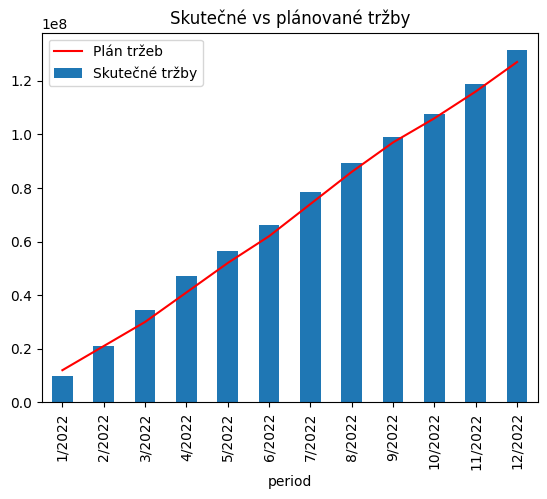

In [36]:
ax = df_joined_plot["sales_plan_cumsum"].plot(color="red", title="Skutečné vs plánované tržby")
df_joined_plot["sales_actual_cumsum"].plot(kind="bar", ax=ax)
plt.legend(['Plán tržeb', "Skutečné tržby"])

Alternativně můžeme použít sloupcový graf pro oba sloupce. Pokud máme stejný typ grafu, můžeme použít jeden příkaz. Jako hodnoty parametrů `y` a `color` nyní zadáme seznamy.

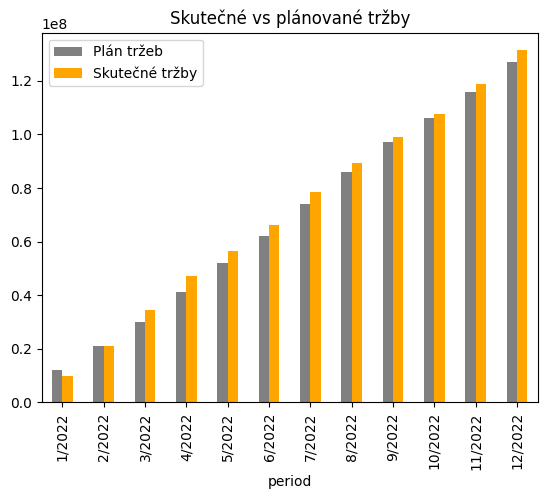

In [35]:
df_joined_plot[["sales_plan_cumsum", "sales_actual_cumsum"]].plot(kind="bar",
                    color=["grey", "orange"], title="Skutečné vs plánované tržby")
plt.legend(['Plán tržeb', "Skutečné tržby"])

Text(0.5, 0, 'Období')

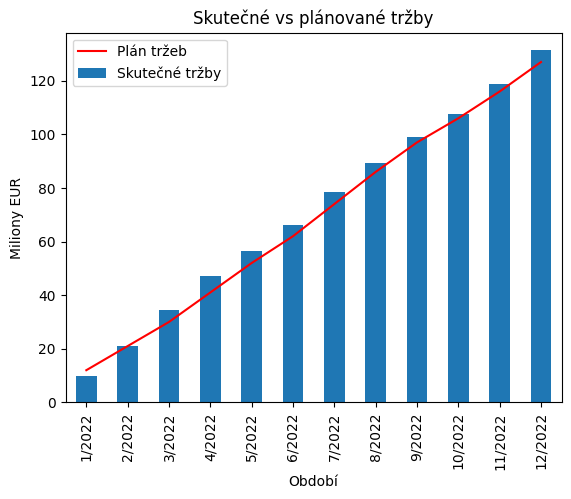

In [34]:
df_joined_plot["sales_plan_cumsum_mil"] = df_joined_plot["sales_plan_cumsum"] / 1_000_000
df_joined_plot["sales_actual_cumsum_mil"] = df_joined_plot["sales_actual_cumsum"] / 1_000_000

ax = df_joined_plot["sales_plan_cumsum_mil"].plot(color="red", title="Skutečné vs plánované tržby")
df_joined_plot["sales_actual_cumsum_mil"].plot(kind="bar", ax=ax)
plt.legend(['Plán tržeb', "Skutečné tržby"])
plt.ylabel("Miliony EUR")
plt.xlabel("Období")

# Odstraňování duplicit

Duplicitami obecně myslíme opakující se hodnoty v datech. Duplicity mohou vzniknou v důsledku chyby, například:

- program zapíše do databáze nebo do logu stejný údaj dvakrát,
- vzniknou při propojení (`merge`) tabulek.

V některých případech je duplicitní pouze část sloupc. Uvažujme data o registraci uživatelů ze souboru [user_registration.json](user_registration.json). V některých případech uživatel vyplnil registrační formulář do aplikace, ale nepotvrdil e-mailovou adresu (např. mu e-mail padl do spamu) a tak se uživatel po nějaké době zaregistroval znovu.

In [1]:
import pandas
data = pandas.read_json("user_registration.json")
data.head()

,date_time,email,ip_address,age_group,marketing_channel
0,2021-03-01 00:02:13.920,qbichler@kabsi.at,168.155.75.206,30-44,Social network
1,2021-03-01 00:04:27.840,robinkolar@chello.cz,105.132.109.66,18-29,Social network
2,2021-03-01 00:06:41.760,zvesela@chello.cz,105.46.12.139,60+,Newspapers or magazine
3,2021-03-01 00:08:55.680,gmaresova@email.cz,141.22.41.210,60+,Newspapers or magazine
4,2021-03-01 00:11:09.600,qkralova@seznam.cz,196.95.130.168,18-29,Friend's recommendation


Zjistíme nyní počet záznamů v souboru.

In [2]:
data.shape[0]

40468

Pokud budeme chtít seznam unikátních e-mailových adres, můžeme na sérii `email` aplikovat metodu `unique()`.

In [4]:
data["email"].unique().shape[0]

34398

Pokud budeme chtít odstranit duplicitní registrace z celé tabulky, můžeme využít metodu `drop_duplicates()`. Ta odebere řádky na základě sloupců definovaých jako parametr `subset`. Pokud parametr nevyplníme, jsou použity všechny sloupce. Dále vybíráme, které řádky chceme ponechat. K tomu slouží parametr `last`. Máme tři možnosti:

- ponechat poslední řádek (`last`),
- ponechat první řádek (`first`),
- neponechat ani jeden z duplicitních řádků (`False`).

V našem případě ponecháme poslední řádek. Počet řádků v souboru nyní odpovídá počtu unikátních e-mailových adres, které jsme získali metodou `unique()`.

In [5]:
data_cleaned = data.drop_duplicates(subset="email", keep="last")
data_cleaned.shape

(34398, 5)

# Cvičení

Uvažuj, že provádíš analýzu stavu zásob v kamenném obchodě. Obchod je otevřený každý všední den, zásoby jsou přivezeny vždy první pracovní den v měsíci. Pro zjednodušení máme záznamy pouze o třech produktech.

- Pomocí kumulativního součtu vytvoř v tabulce sloupec, který udává množství každého z produktů na skladě.
- V daném období zažíval obchod problémy se zásobováním a některé zboží tak bylo vyprodané. Zjisti pro každý z produktů, kolik dní v roce byl vyprodaný, tj. kolik dní v roce byl stav zásob 0.
- Pokud není zboží na skladě, znamená to problém, protože zákazník si půjde koupit produkt ke konkurenci. Abychom škody vyčíslili, potřebujeme vědět, kolik produktů bychom mohli prodat. Vytvoř tedy novou tabulku, kam pomocí dotazu vyber řádky, kdy je velikost změny záporná (tím vyřadíš dny, kdy bylo zboží vyprodáno, i řádky s doplňováním zásob).
- Pomocí agregace spočítej, kolik bylo v průměru prodáno každého zboží.


- Vytvoř graf, který zobrazuje průběh stavu zásoby jednoho z produktů.
- Dále zkus vytvořit graf průběhu stavu zásob všech tří uváděných produktů. Je z grafu vidět, kterého produktu je největší nedostatek? A kterého produktu má obchod naopak největší zásobu?